In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('Mushroom Dataset.csv')                            #loading the dataset

In [3]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
ds.shape

(8124, 23)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
ds.dtypes                                    #all columns are of object datatype

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
ds.isnull().sum()                                             #no null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

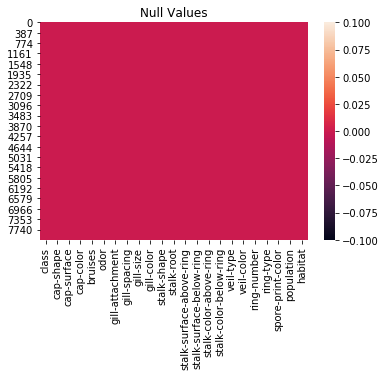

In [8]:
sns.heatmap(ds.isnull())
plt.title('Null Values')
plt.show()                                        #no null values

In [9]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
ds['veil-type'].unique()

array(['p'], dtype=object)

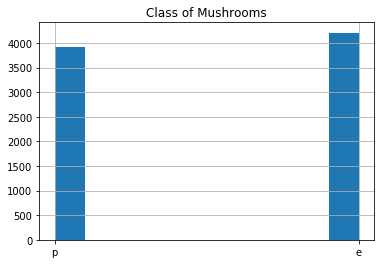

In [11]:
ds['class'].hist(grid = True)                                  #univariate analysis
plt.title('Class of Mushrooms')
plt.show()

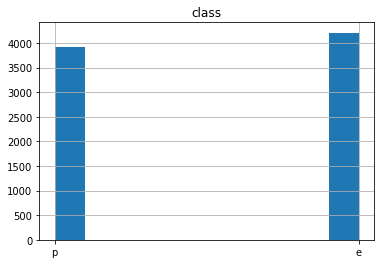

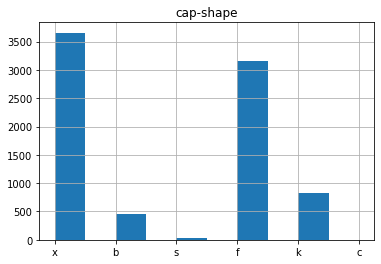

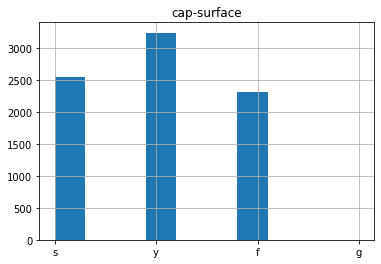

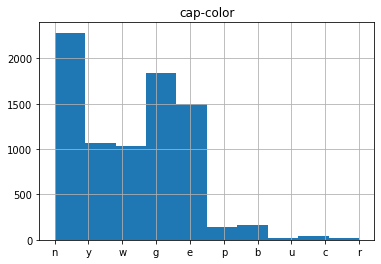

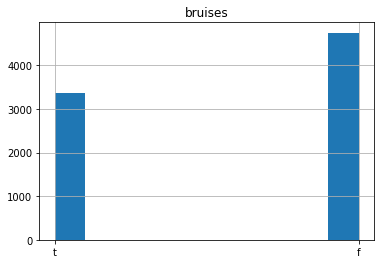

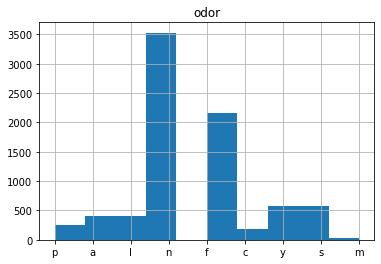

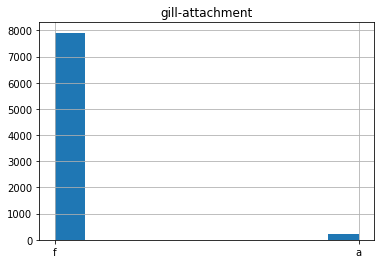

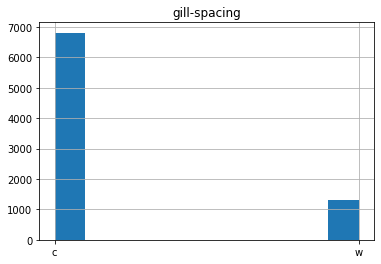

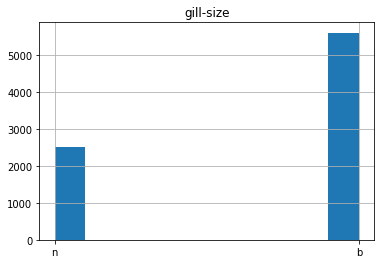

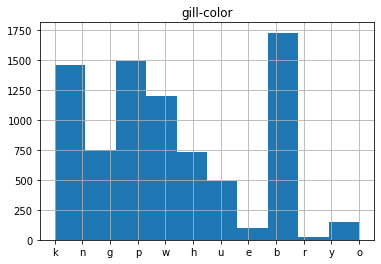

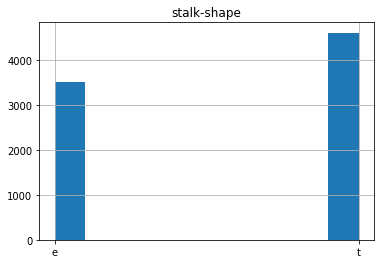

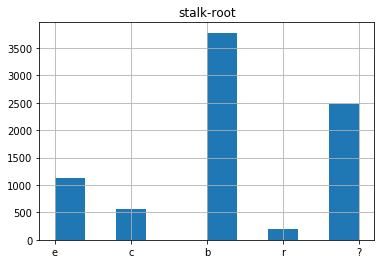

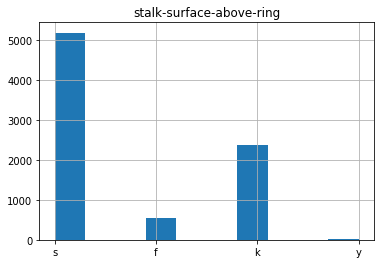

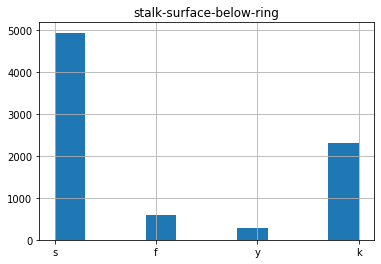

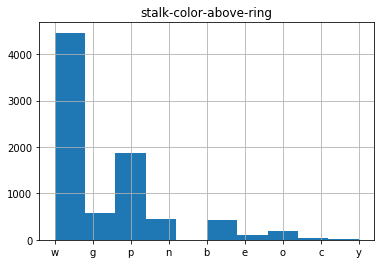

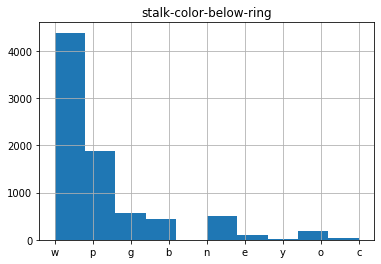

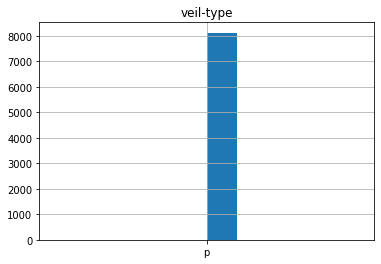

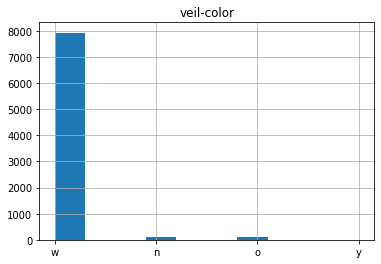

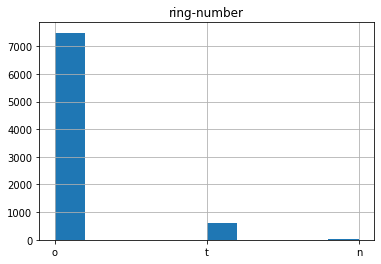

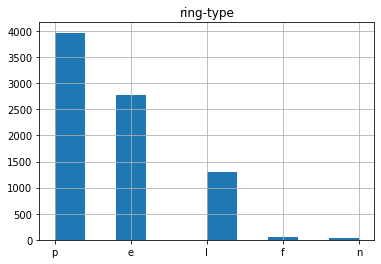

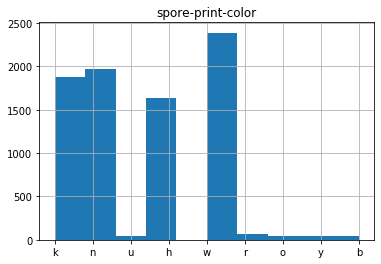

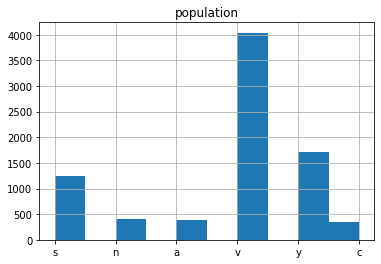

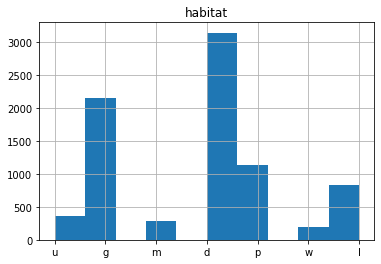

In [12]:
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in columns:
    ds[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [13]:
ds.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

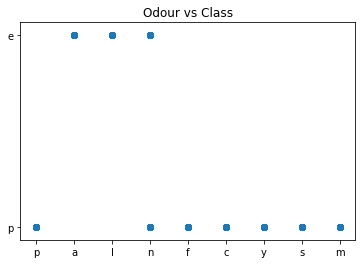

In [14]:
plt.scatter(ds['odor'], ds['class'], alpha = 0.5)
plt.title('Odour vs Class')
plt.show()

The plot isn't very helpful

In [15]:
s = (ds.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [16]:
from sklearn.preprocessing import LabelEncoder                           #label encoding dataset
le = LabelEncoder()
for col in object_cols:
    ds[col] = le.fit_transform(ds[col])

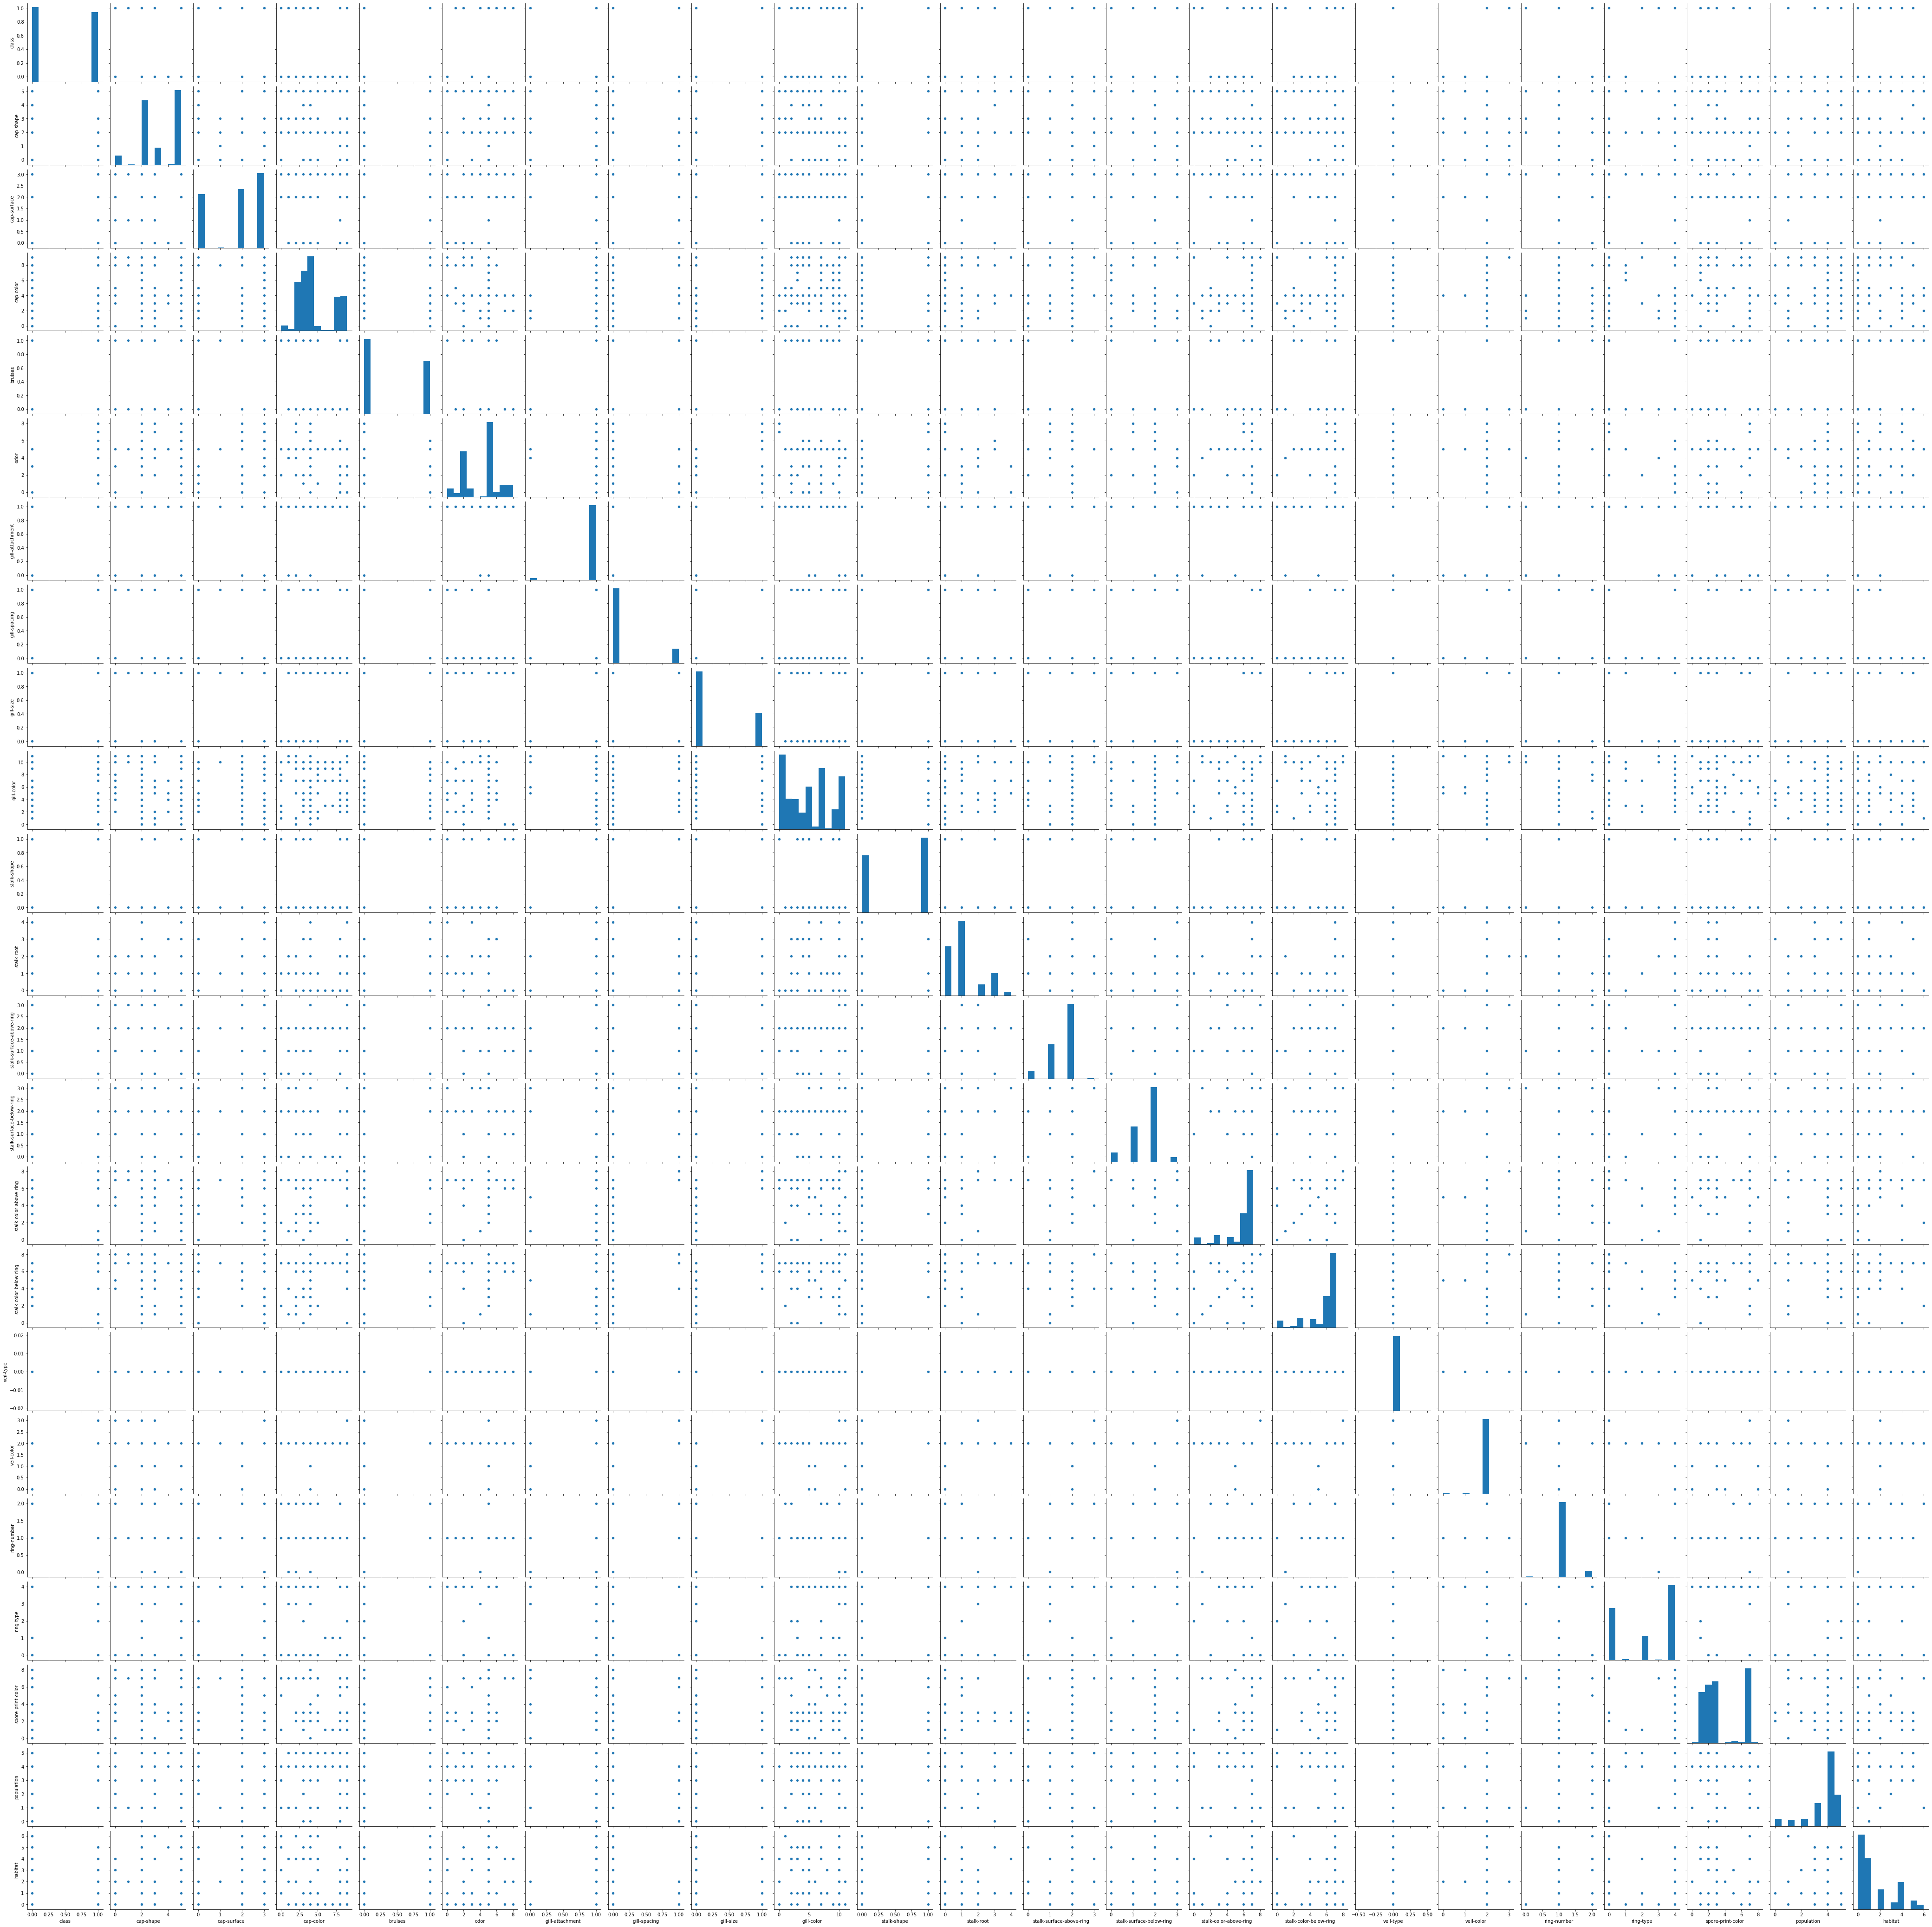

In [17]:
sns.pairplot(ds)

The graphs are too small and hard to understand

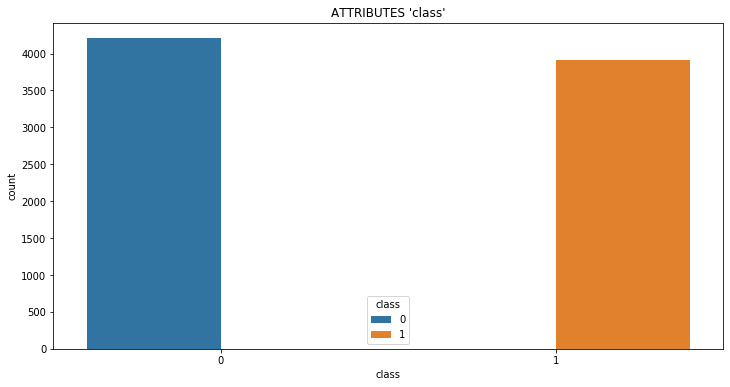

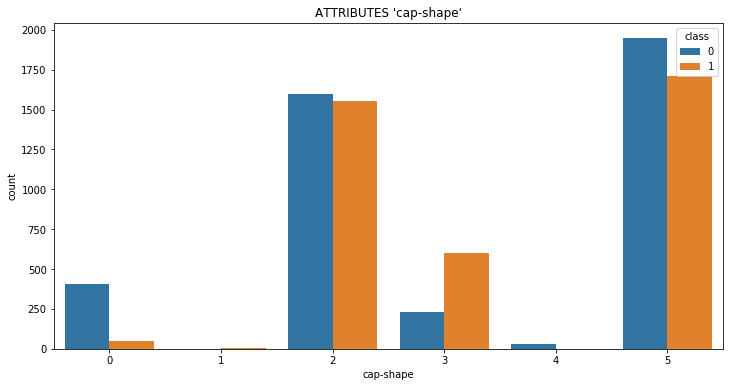

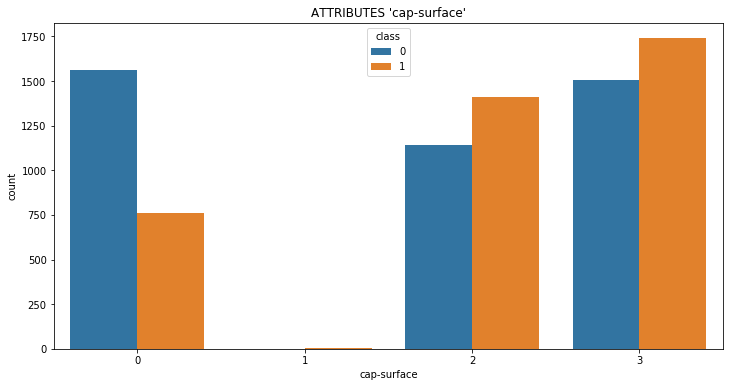

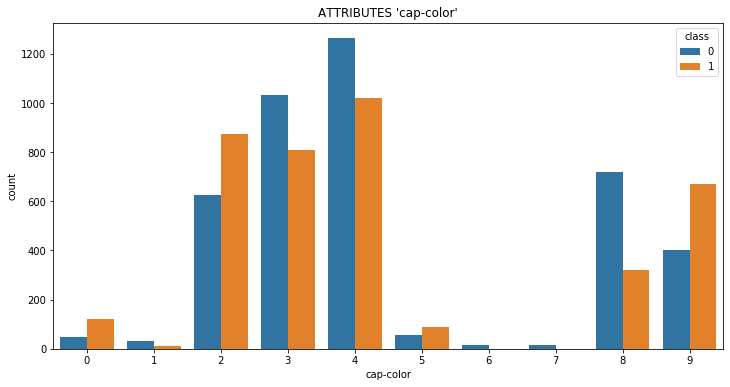

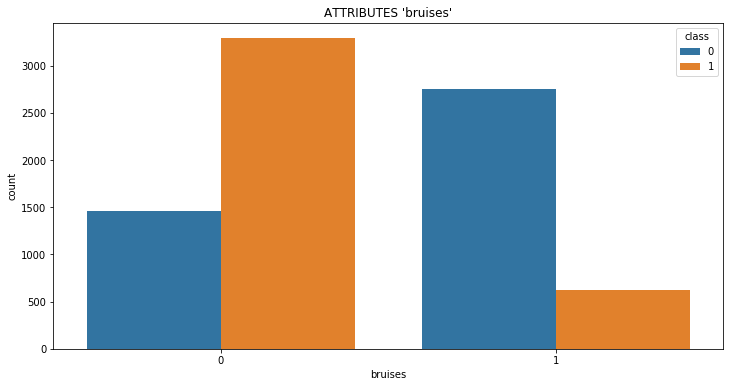

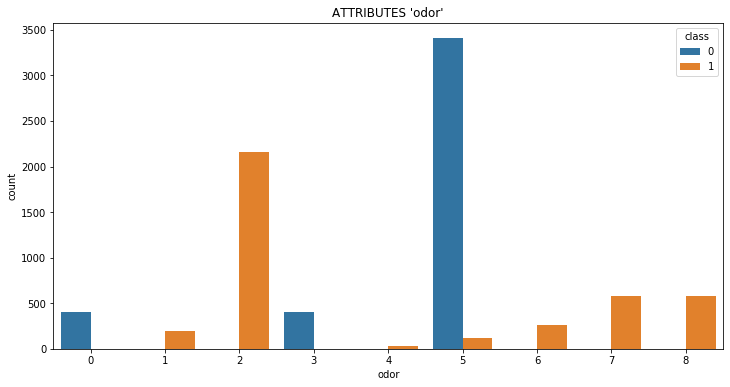

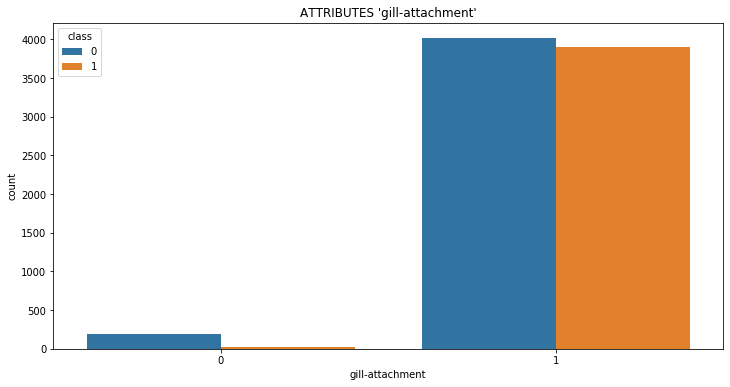

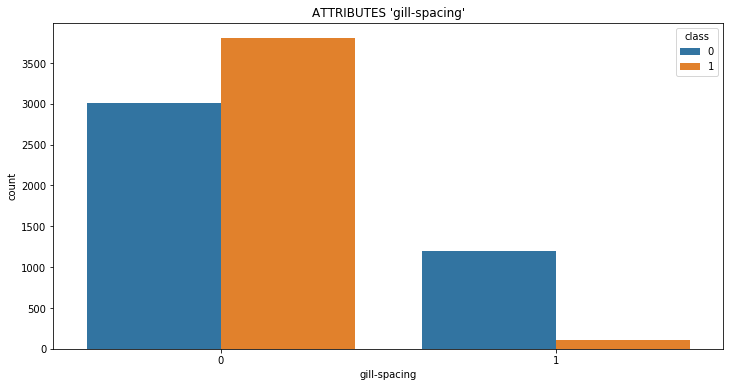

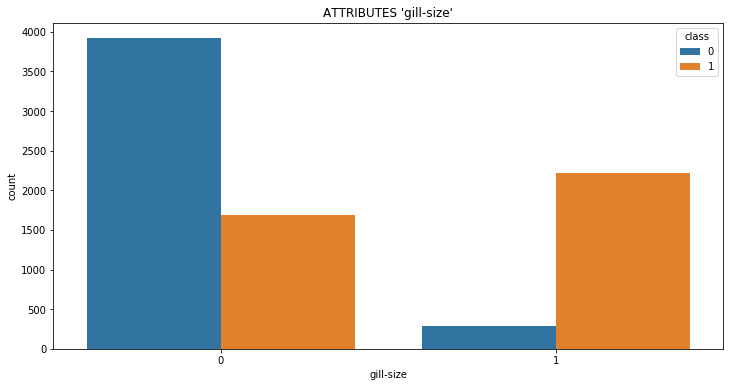

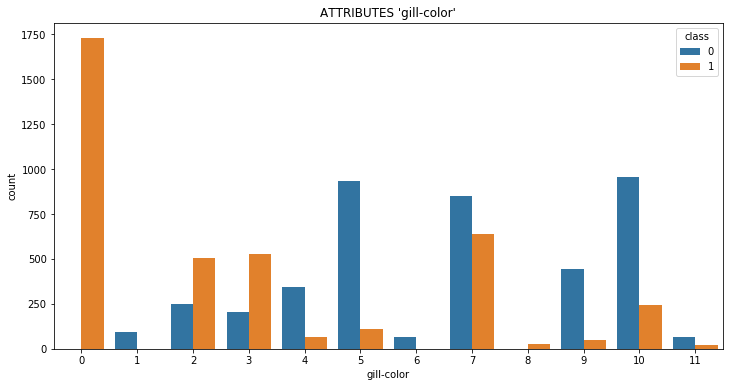

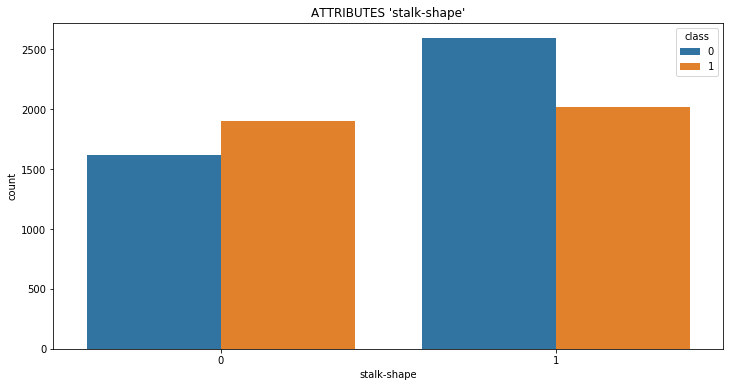

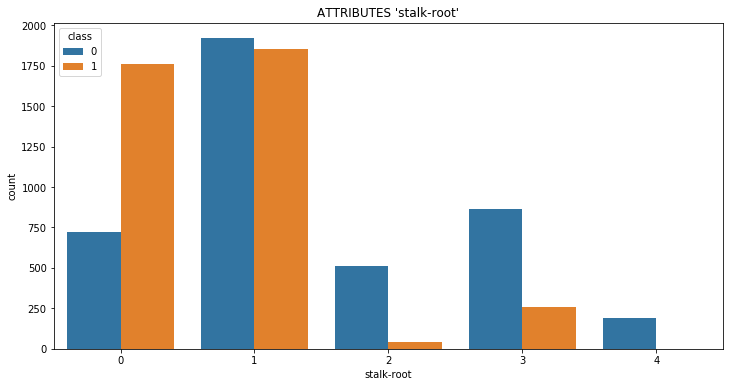

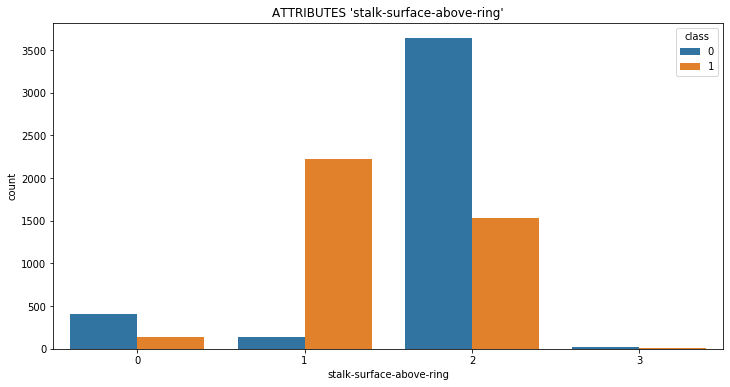

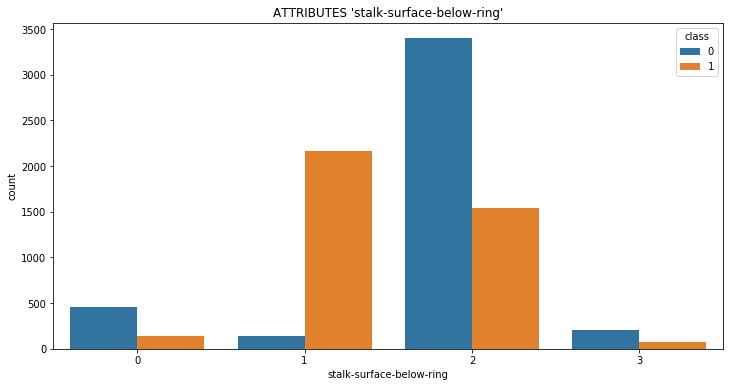

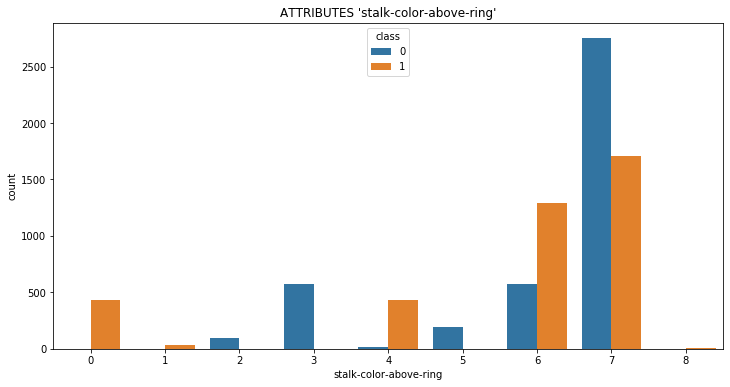

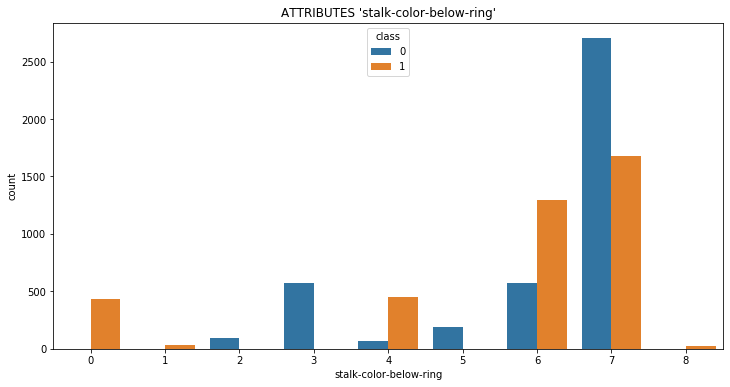

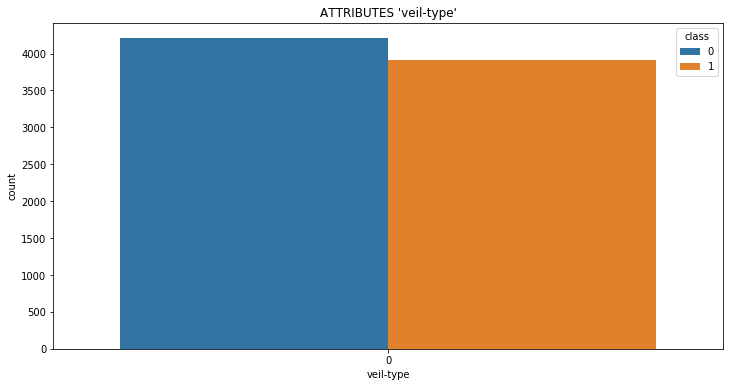

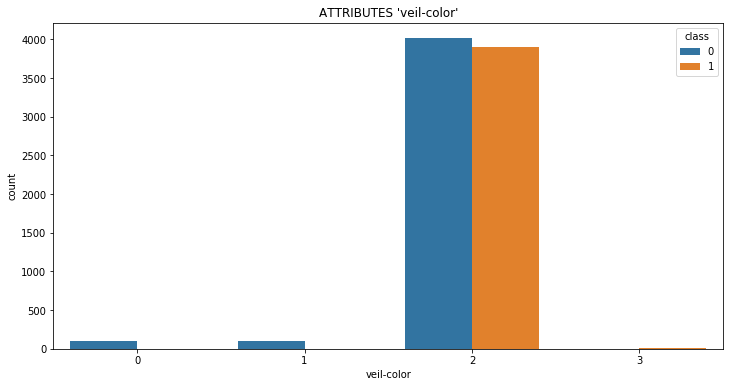

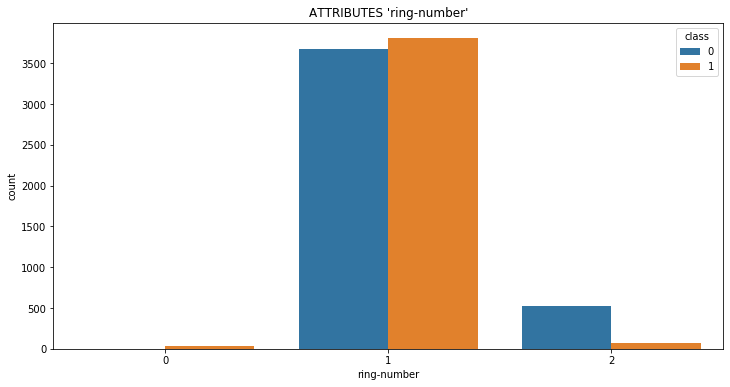

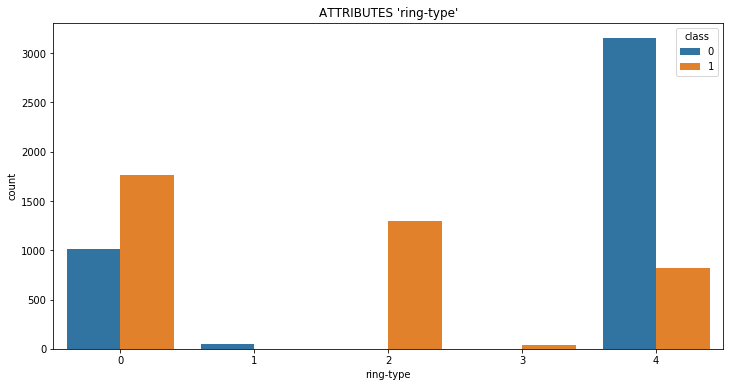

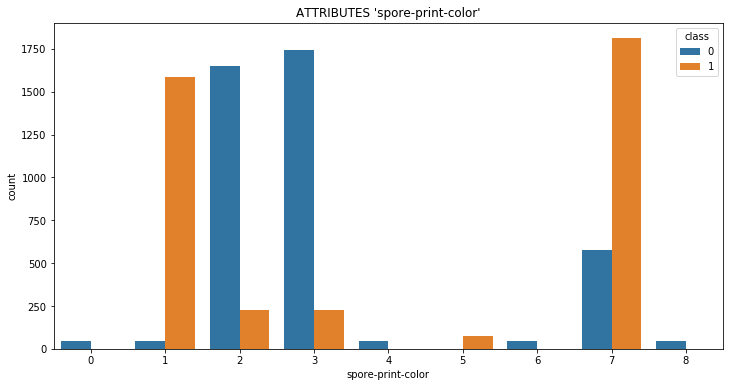

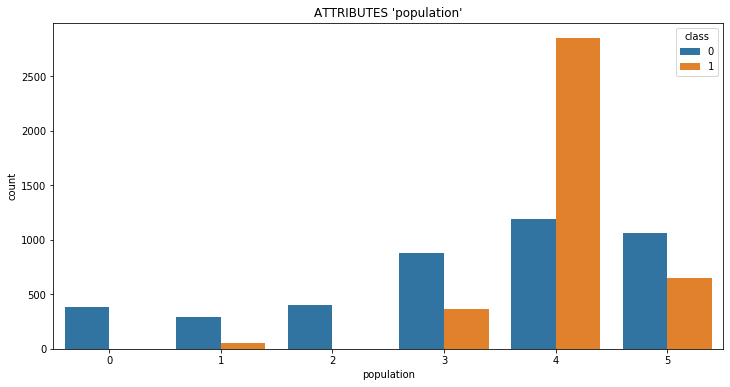

In [18]:
for i in object_cols[:-1]:                                #bivariate analysis
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(ds[i],hue=ds['class'])

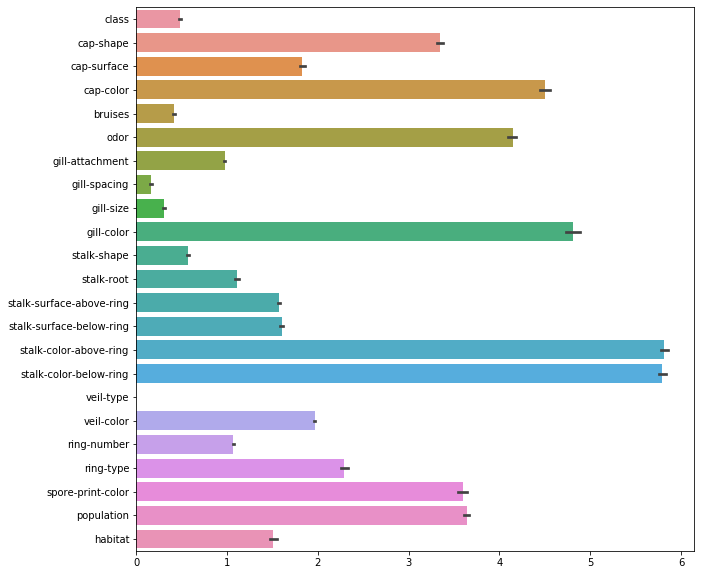

In [19]:
plt.figure(figsize=(10, 10))                            #multivariate analysis
sns.barplot(data = ds, orient='h')

In [20]:
x = ds.drop(['class'], axis = 'columns')

In [21]:
y = ds['class']

# Finding Best Random State

In [22]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.9593929450369155 on Random State 417


# Creating train-test-split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 417)

In [24]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print (accuracy_score(y_test, predlr))
print (confusion_matrix(y_test, predlr))
print (classification_report(y_test, predlr))


0.9593929450369155
[[1212   51]
 [  48 1127]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1263
           1       0.96      0.96      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
prednb = nb.predict(x_test)
print (accuracy_score(y_test, prednb))
print (confusion_matrix(y_test, prednb))
print (classification_report(y_test, prednb))


0.9273995077932732
[[1164   99]
 [  78 1097]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1263
           1       0.92      0.93      0.93      1175

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [26]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
preddtc = DTC.predict(x_test)
print (accuracy_score(y_test, preddtc))
print (confusion_matrix(y_test, preddtc))
print (classification_report(y_test, preddtc))


1.0
[[1263    0]
 [   0 1175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print (accuracy_score(y_test, predrf))
print (confusion_matrix(y_test, predrf))
print (classification_report(y_test, predrf))


1.0
[[1263    0]
 [   0 1175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print (accuracy_score(y_test, predsvc))
print (confusion_matrix(y_test, predsvc))
print (classification_report(y_test, predsvc))


0.9905660377358491
[[1260    3]
 [  20 1155]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1263
           1       1.00      0.98      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [29]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(LR, x, y, cv = 5)
print ('Cross Validation Score for Logistic Regression model is :', cvs.mean())

Cross Validation Score for Logistic Regression model is : 0.8387330807123912


In [30]:
cvs = cross_val_score(DTC, x, y, cv = 5)
print ('Cross Validation Score for Decision Tree Classifier model is :', cvs.mean())

Cross Validation Score for Decision Tree Classifier model is : 0.9049458128078818


In [31]:
cvs = cross_val_score(rf, x, y, cv = 5)
print ('Cross Validation Score for Random Forest Classifier model is :', cvs.mean())

Cross Validation Score for Random Forest Classifier model is : 0.8998963243652899


In [32]:
cvs = cross_val_score(nb, x, y, cv = 5)
print ('Cross Validation Score for Gaussian NB is :', cvs.mean())

Cross Validation Score for Gaussian NB is : 0.7259685486926866


In [33]:
cvs = cross_val_score(svc, x, y, cv = 5)
print ('Cross Validation Score for Support Vector Classifier model is :', cvs.mean())

Cross Validation Score for Support Vector Classifier model is : 0.841292231906025


Minimum difference in accuracy and cross val score is in Decision Tree Classifier, so this is our best model

In [34]:
import joblib

joblib.dump(DTC, 'MushroomsDTC.obj')

['MushroomsDTC.obj']